<a href="https://colab.research.google.com/github/FarazAhmad2/EDA-on-Hotel-Booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 50)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# loading csv File
file_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Hotel Booking Analysis - Faraz Ahmad/Hotel Bookings.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# Checking for null values
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

###The columns “agent” and “company” have a high number of missing values. As these columns won’t be relevant for our analysis, we can delete them.


In [8]:
df = df.drop(['company','agent'], axis=1)

###The columns “children” and “country” have a small number of missing values. We will remove the full row on missing cells.


In [9]:
df = df.dropna(axis=0).reset_index(drop=True)

In [10]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

In [11]:
# Checking if there are no guests
df[(df.adults + df.babies + df.children == 0)].shape

(170, 30)

In [12]:
# These rows does not make any sense. So, dropping these rows
df = df.drop(df[(df.adults + df.babies + df.children == 0)].index).reset_index(drop=True)

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000
mean,0.371757,104.401312,2016.157596,27.165100,15.800965,0.928307,2.500918,1.861052,0.104356,0.007959,0.031593,0.087208,0.131612,0.218828,2.330638,102.133442,0.061915,0.571778
std,0.483276,106.915284,0.707456,13.586362,8.780412,0.992725,1.889089,0.574697,0.399439,0.097449,0.174915,0.846419,1.485300,0.638914,17.633065,50.389602,0.244230,0.792740
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


 # **1.How many bookings were cancelled or not (Hotel wise) ?**

In [14]:
booking_info = pd.DataFrame(df.groupby('hotel')['is_canceled'].value_counts())
booking_info.columns = ['no of bookings']
booking_info['percentage'] = df.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100
booking_info

no of bookings  percentage
hotel        is_canceled                            
City Hotel   0                     46082   58.226249
             1                     33061   41.773751
Resort Hotel 0                     28508   72.017178
             1                     11077   27.982822

[Text(0.5, 0, 'Hotels')]

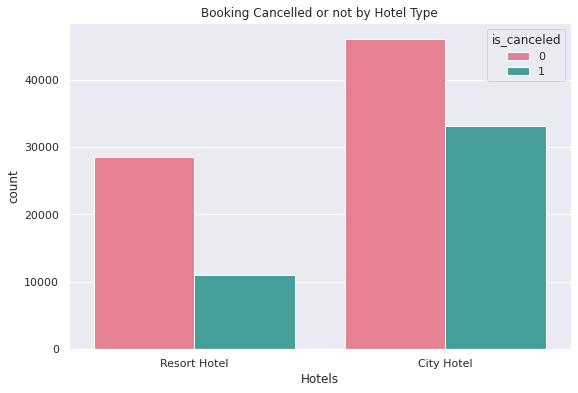

In [15]:
plt.rcParams['figure.figsize'] = (9, 6)
plt.title("Booking Cancelled or not by Hotel Type")
sns.countplot(x='hotel',data=df,hue='is_canceled', palette='husl').set(xlabel='Hotels')

# **2. Booking ratio between hotels**

In [16]:
preference = pd.DataFrame(df.hotel.value_counts())
preference['percentage'] = df.hotel.value_counts(normalize=True)*100
preference.index.name = 'hotel'
preference.rename({'hotel': 'no of bookings'},axis=1,inplace=True)
preference

,no of bookings,percentage
hotel,,
City Hotel,79143,66.659086
Resort Hotel,39585,33.340914


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Bookings'),
 Text(0.5, 0, 'City Hotel vs Resort Hotel'),
 Text(0.5, 1.0, 'Hotel Comparison')]

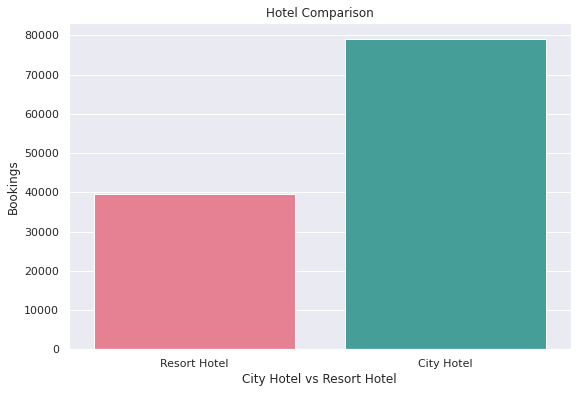

In [17]:
sns.countplot(df.hotel,palette='husl').set(xlabel='City Hotel vs Resort Hotel', ylabel='Bookings',title='Hotel Comparison')

### As we can see, booking rate of City Hotel is higher.

# **3. Which month has the highest number of arrivals ?**

In [18]:
confirmed_bookings = df.loc[df.is_canceled == 0]
confirmed_bookings.reset_index(drop=True, inplace=True)
people_arrival_count_df = pd.DataFrame(confirmed_bookings['arrival_date_month'].value_counts()).reset_index()
people_arrival_count_df.columns = ['arrival_date_month','No of people']
people_arrival_count_df

,arrival_date_month,No of people
0,August,8604
1,July,7880
2,May,7091
3,October,6854
4,March,6566
5,April,6528
6,June,6384
7,September,6360
8,February,5304
9,November,4611


[Text(0, 0.5, 'People count'), Text(0.5, 0, 'Months')]

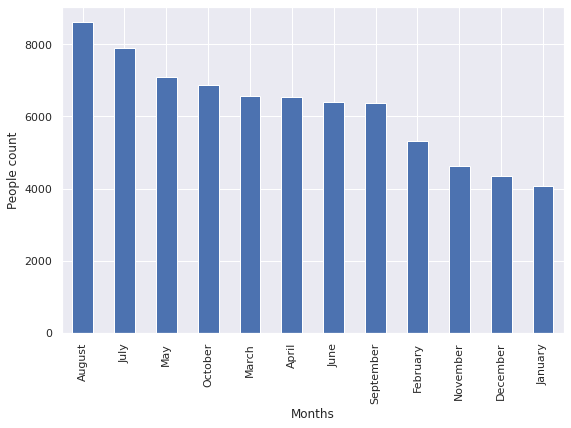

In [19]:
confirmed_bookings['arrival_date_month'].value_counts().plot(kind='bar').set(xlabel=('Months'), ylabel=('People count'))

# **4.Hotel wise yearly bookings**

In [20]:
yrly_bookings = pd.DataFrame(confirmed_bookings.groupby('arrival_date_year')['hotel'].value_counts())
yrly_bookings.columns = ['No of bookings']
yrly_bookings

No of bookings
arrival_date_year hotel                       
2015              City Hotel              7654
                  Resort Hotel            6071
2016              City Hotel             22662
                  Resort Hotel           13389
2017              City Hotel             15766
                  Resort Hotel            9048

Text(0.5, 1.0, 'yearly bookings')

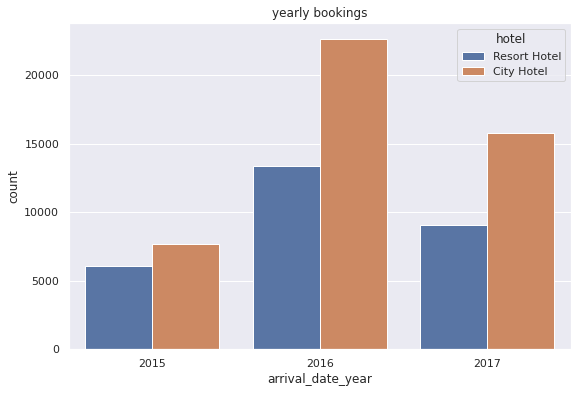

In [21]:
sns.countplot (x= 'arrival_date_year', data=confirmed_bookings, hue= 'hotel').set_title ('yearly bookings')

# **5. From which country the people are coming most ?**

In [22]:
#  Top 10 countries from where the people are coming most
country = pd.DataFrame(confirmed_bookings.country.value_counts())
country.columns= ['no of bookings']
country.head(10)

,no of bookings
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
IRL,2542
ITA,2428
BEL,1868
NLD,1716
USA,1592


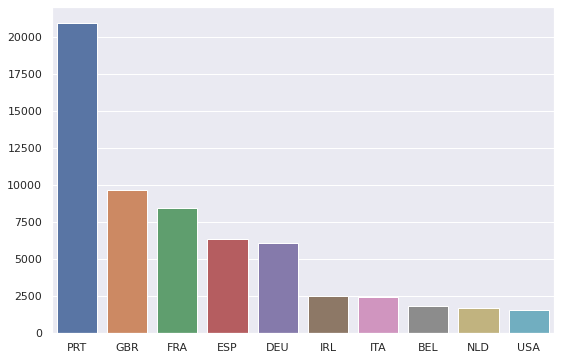

In [23]:
sns.barplot (y= list(confirmed_bookings.country.value_counts().head (10)), x= list(confirmed_bookings.country.value_counts().head(10).index))

# **6. Market Segment wise bookings**

In [24]:
mrkt_df = pd.DataFrame(confirmed_bookings.market_segment.value_counts())
mrkt_df.index.name = 'market_segment'
mrkt_df.columns = ['no of booking']
mrkt_df

,no of booking
market_segment,
Online TA,35599
Offline TA/TO,15854
Direct,10504
Groups,7692
Corporate,4121
Complementary,637
Aviation,183


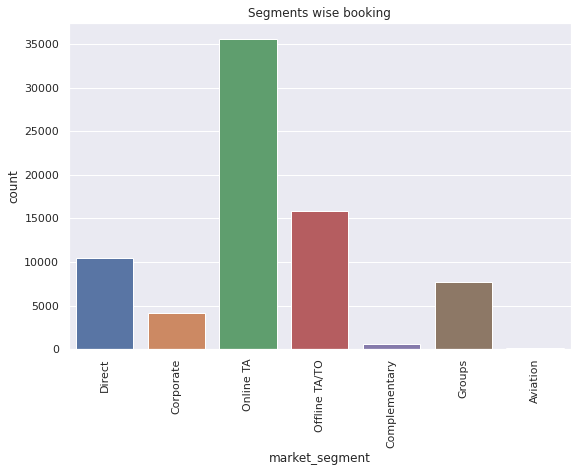

In [25]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = confirmed_bookings)
plt.xticks(rotation = 90)
plt.show()

# **7. Prices per month**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


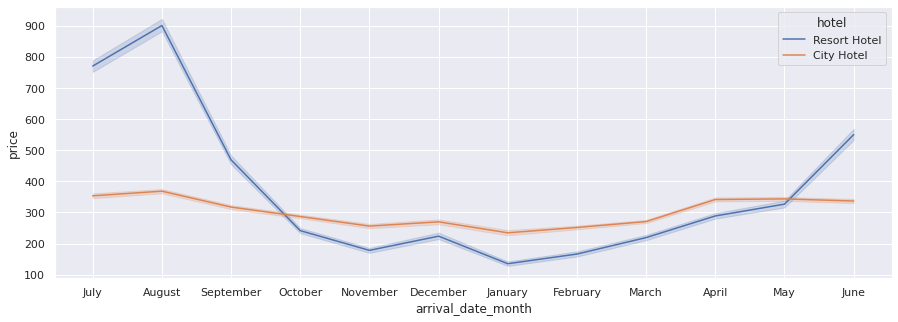

In [43]:
plt.figure(figsize=(15,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 0]
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()